In [6]:
#cell 1

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [7]:
#cell 2
def delay(M1,M2,tstart,fstar):
    
    dt=1/4000 #0.00001
    
    ###############
    
    M_chirp= ((M1*M2*1.99*10**30*1.99*10**30)**(3/5))/(((M1+M2)*1.99*10**30)**(1/5))
    m_total=(M1+M2)*1.98*10**30
    mu=((M1*M2)/(M1+M2))*1.98*10**30
    G=6.67*10**-11
    c=3*10**8
    
    ################
    
    def frequency(t,M_chirp,t_merg):
        return ((((8*np.pi)**(8/3))/5)*((M_chirp*G/((c)**3))**(5/3))*(t_merg-t))**(-3/8)    ## equation 1.32
    
    
    T=np.arange(-tstart,0,dt)  #creating a time array with at as stepsize
    
    F=frequency(T,M_chirp,0)
    # f_ISCO=F[-1] 
    f_ISCO=((c**3)/(np.pi*G*M1*1.99*10**30))*((1/216)**0.5)    ##equation 1.38
    
    # a=-1
    a=np.where(F>f_ISCO)[0][0] #####   # a is the index of the point in F array where value is greater than f_ISCO
    
    ################ 
    
    M=G*m_total/c**3
    
    ## As per discusssion 2.6.1 Frequency-time dependence
    
    def tau_00(f,t):
        return (5/(256*np.pi))*(1/fstar)*((np.pi*M*fstar)**-(5/3))*(m_total/mu)
    
    def tau_10(f,t):
        return (5/(192*np.pi))*(1/fstar)*((np.pi*M*fstar)**-1)*(m_total/mu)*((743/336)+((11/4)*(mu/m_total)))
    
    def tau_15(f,t):
        return (1/(8*fstar))*((np.pi*M*fstar)**(-2/3))*(m_total/mu)
    
    def tau_20(f,t):
        return (5/(128*np.pi))*(1/fstar)*((np.pi*M*fstar)**(-1/3))*(m_total/mu)*((3058673/1016064)+((5429/1008)*(mu/m_total))+((617/144)*((mu/m_total)**2)))
    
    def dfdt(f,t):
        return ((3*fstar/(8*tau_00(f,t)))*((f/fstar)**(11/3)))*(1-((3*tau_10(f,t)/(4*tau_00(f,fstar)))*((f/fstar)**(2/3)))+((5*tau_15(f,t)/(8*tau_00(f,t)))*(f/fstar))-((1/2)*((tau_20(f,t)/tau_00(f,t))-((9/8)*((tau_10(f,t)/tau_00(f,t))**2)))*((f/fstar)**(4/3))))
    
    
    t=np.arange(0,tstart+5,dt)     # we add +5 to tstart to get f values beyond tstart
    
    f=odeint(dfdt,F[0],t)
    
    b=np.where(f>f_ISCO)[0][0] #####  # b is the index of the point in f array where value is greater than f_ISCO
    
    T=T-T[0]
    
    return t[b-1]-T[a-1],F[0]   #delay, initial frequency

In [9]:
#cell 3 - Calculating Delay as a function of Mass of a member of an equal mass Binary

DelayF_0=[]
Masses=[]

#Looping the function over a range of masses to get the delay
for M1 in range(2,102,2):
    DelayF_0+=[delay(M1,M1,20,10)]
    Masses+=[M1]

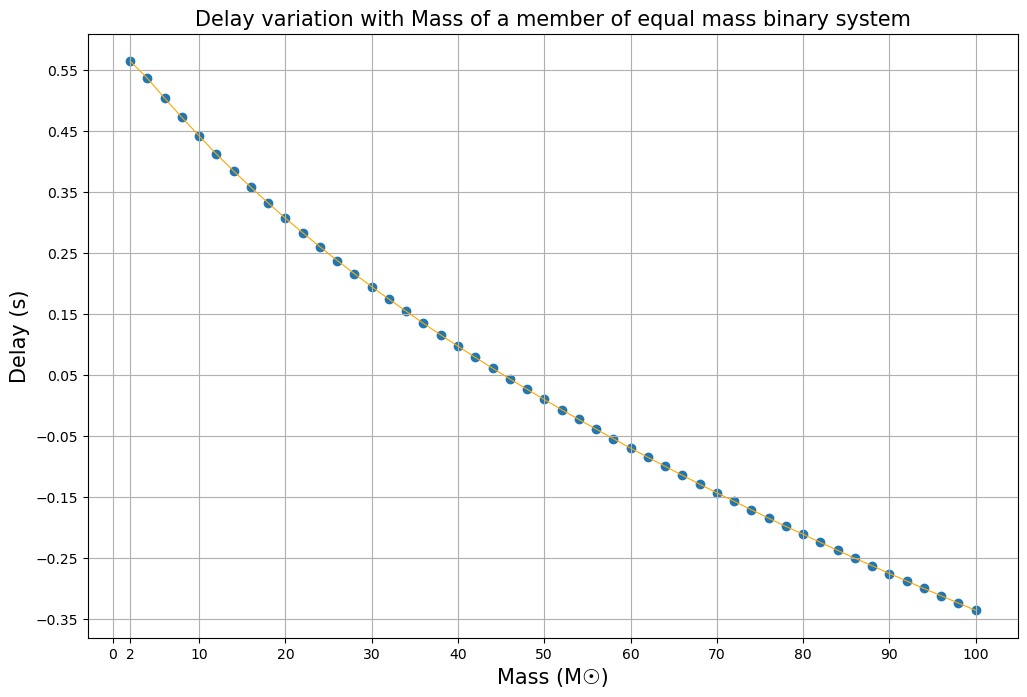

In [14]:
#cell 4 Plot for #cell 3

DelayF_0=np.array(DelayF_0)

plt.figure(figsize=(12,8),dpi=100)
plt.plot(Masses,DelayF_0[:,0], color='orange',linewidth=0.8)
plt.scatter(Masses,DelayF_0[:,0])
plt.title("Delay variation with Mass of a member of equal mass binary system",fontsize=15)
plt.xlabel('Mass (M☉)',fontsize=15)
plt.ylabel('Delay (s)',fontsize=15)
plt.xticks([0,2,10, 20, 30, 40, 50, 60, 70, 80, 90,100]) 
plt.yticks(np.arange(-0.350,0.650, 0.1)) 
plt.grid()
plt.show()
#plt.savefig('Massdelay.jpg')

In [12]:
#cell 5 - Calculating Delay as a function of start time with fstar set constant to 10

TDelayF_0=[]
Tstart=[]

Mss=35
#Looping the function with mass Mss over a range of tstart to get the delay
for tstart in range (3,51):
    TDelayF_0+=[delay(Mss,Mss,tstart,10)]
    Tstart+=[tstart]

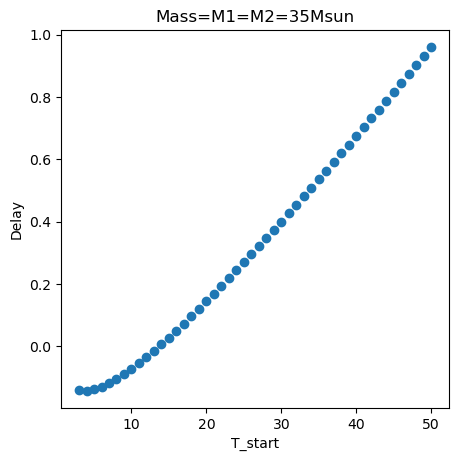

In [13]:
#cell 6 Plot for #5

TDelayF_0=np.array(TDelayF_0)

plt.figure(figsize=(5,5),dpi=100)
plt.scatter(Tstart,TDelayF_0[:,0])
plt.title('Mass=M1=M2='+str(Mss)+'Msun')
plt.xlabel('T_start')
plt.ylabel('Delay')
plt.show()
